# Work Flow

## 1. Define the problem:
- **Objective**: Predict house prices based on features like location, size, number of different rooms, etc.
- **Problem**: Regression (the target variable is continuous)
    - Besides, there are 3 other problems includes classification / Clustering / Time-series Forecasting 
- **Output**: A numerical prediction of the house price.

## 2. Data preprocessing:
- **Understand data structure** --> evaluate:
    - Check the percentage of missing data --> drop? fill?
    - Drop data if no important data need to be concerned / more than 50% of the total is missing
    - Fill data if < 5-10% missing values 
        - Fill with the most common value (mode) / creating a new category like "Missing"
        - Fill using mean/median/interpolation if the data is numerical type
    - Check the nunique() data for each features --> group / classify
- **Feature Engineering**
    - Convert categorical features using one-hot encoding  
    - Scale numerical features using standardization.
- **Train/Test split** 

## 3. Choose a Model and Train:
- **Process**
    - Feed training data into the model.
    - Adjust parameters to minimize error. 
    - Save the trained model for predictions.

## 4. Evaluate performance: --> MAE, MSE, ...
 
## 5. Predict and visualize: 
- Input new data with correct format

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
print(data.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
#check for missing values
for feature in data.columns:
    if data[feature].isnull().sum() > 0:
        print(feature, data[feature].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [4]:
#crop the LotFrontage column
data = data.drop('LotFrontage', axis=1)
data = data.drop('Id', axis=1) # not useful for prediction
data = data.drop('Alley', axis=1) 
data = data.drop('PoolQC', axis=1) 
data = data.drop('Fence', axis=1) 
data = data.drop('MiscFeature', axis=1) 
data = data.drop('FireplaceQu', axis=1) 
data = data.drop('MasVnrType', axis=1) 

In [5]:
#check for missing values
for feature in data.columns:
    if data[feature].isnull().sum() > 0:
        print(feature, data[feature].isnull().sum())

MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [6]:
numerical_features = data.select_dtypes(include=['number']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Fill missing values
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

# for col in categorical_features:
#     data[col] = data[col].fillna('0').astype('category').cat.codes 

In [7]:
#print all numerical features columns
print(numerical_features)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [8]:
print(data.head(5))

   MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0    

In [9]:
#check for feature have binary values
for feature in data.columns:
    if len(data[feature].unique()) == 2:
        print(feature, data[feature].unique())

Street ['Pave' 'Grvl']
Utilities ['AllPub' 'NoSeWa']
CentralAir ['Y' 'N']


In [10]:
# check for feature have more than 5 values and is a string type
for feature in data.columns:
    if len(data[feature].unique()) > 2 and data[feature].dtype == 'object':
        print(feature, data[feature].unique())    

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco

# Convert Numerical features

In [11]:
binary_features = ['Street', 'Utilities', 'CentralAir']

#convert binary features to 0 and 1
binary_mappings = {
    'Street': {'Pave': 0, 'Grvl': 1},
    'Utilities': {'AllPub': 0, 'NoSeWa': 1},
    'CentralAir': {'N': 0, 'Y': 1}
}

for feature in binary_features:
    data[feature] = data[feature].map(binary_mappings[feature])

for feature in binary_features:
    print(feature, data[feature].unique())

Street [0 1]
Utilities [0 1]
CentralAir [1 0]


## Convert Categorical features --> one hot encoding

In [12]:
for feature in data.columns:
    if len(data[feature].unique()) > 2 and data[feature].dtype == 'object':
        data = pd.get_dummies(data, columns=[feature]).fillna(0)
        #  convert to integers
        dummy_cols = [col for col in data.columns if col.startswith(feature + '_')]
        data[dummy_cols] = data[dummy_cols].astype(int)

In [13]:
# print the name of the columns using get_dummies
# print(data.columns[40:50].values)
print(data.iloc[:, 40:51])

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR1  \
0               0            0            1            0             0   
1               0            0            1            0             0   
2               0            0            1            0             1   
3               0            0            1            0             1   
4               0            0            1            0             1   
...           ...          ...          ...          ...           ...   
1455            0            0            1            0             0   
1456            0            0            1            0             0   
1457            0            0            1            0             0   
1458            0            0            1            0             0   
1459            0            0            1            0             0   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0                0             0            

## Visualize Feature Distributions

Numerical Features:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


<Figure size 1000x600 with 0 Axes>

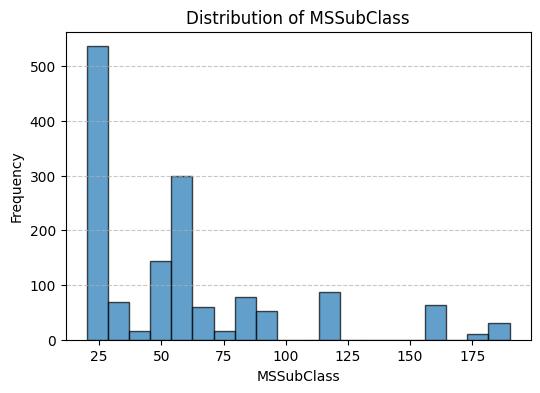

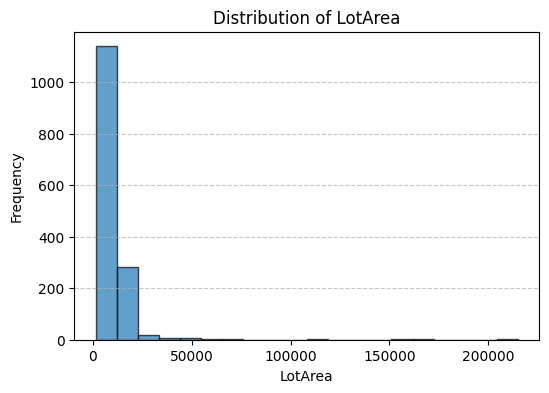

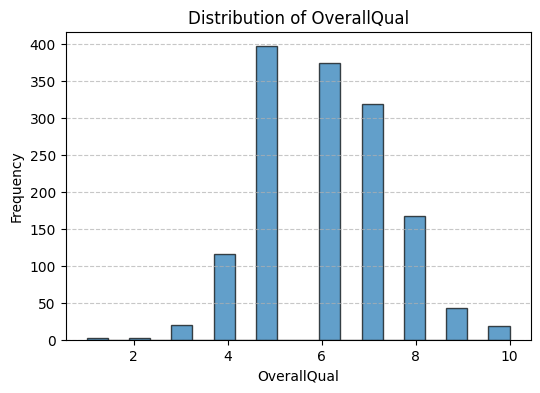

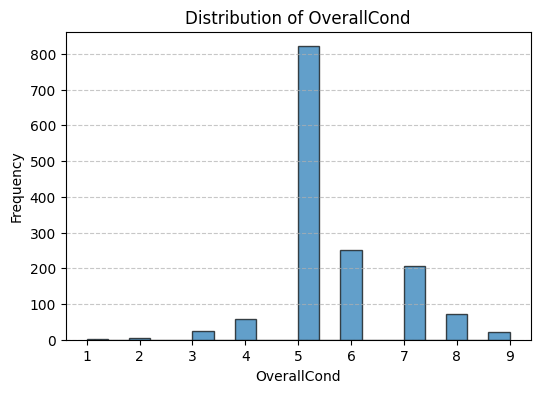

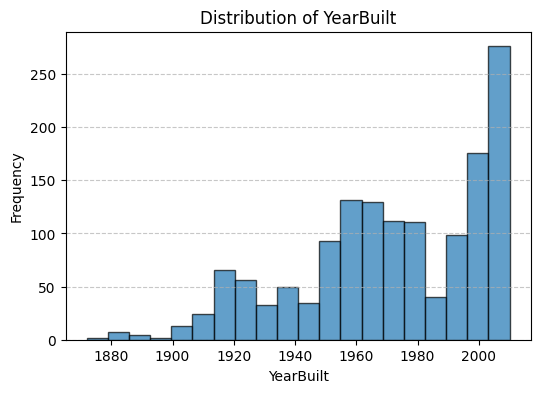

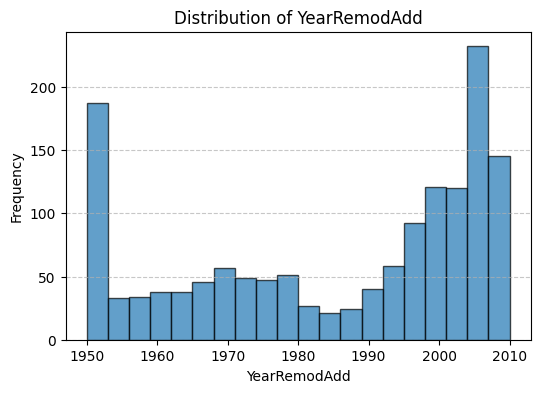

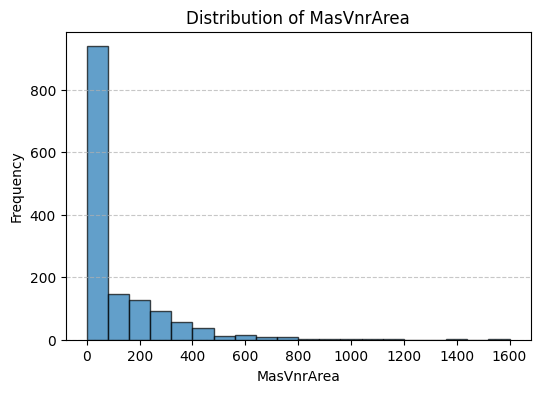

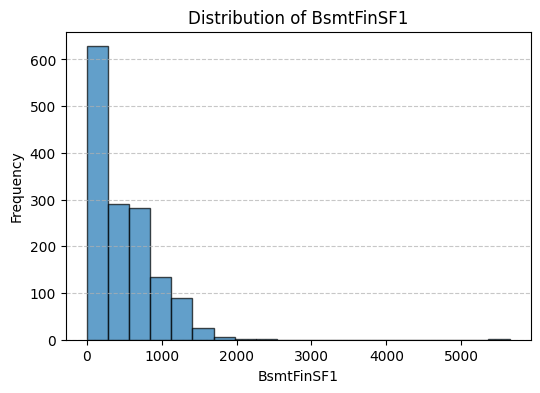

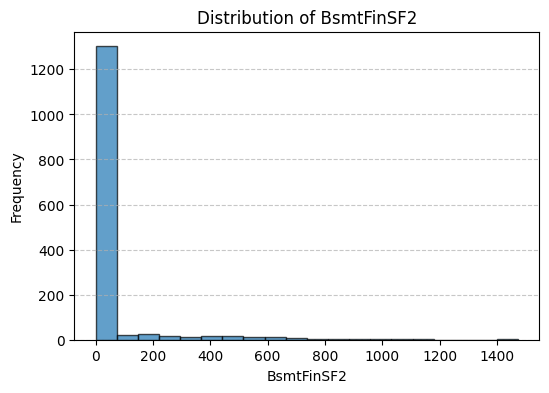

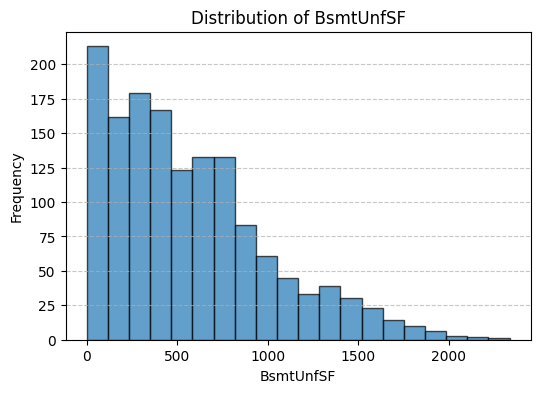

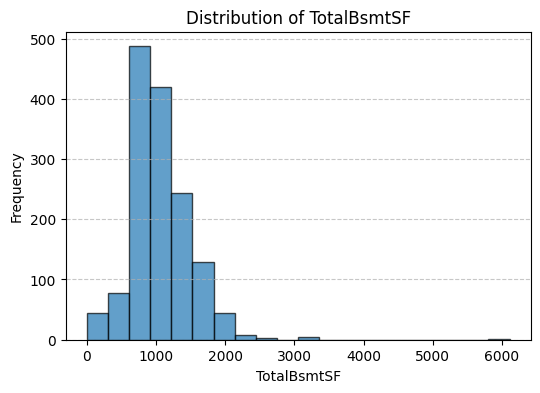

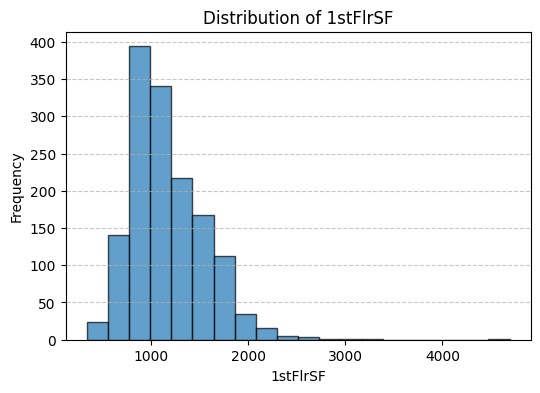

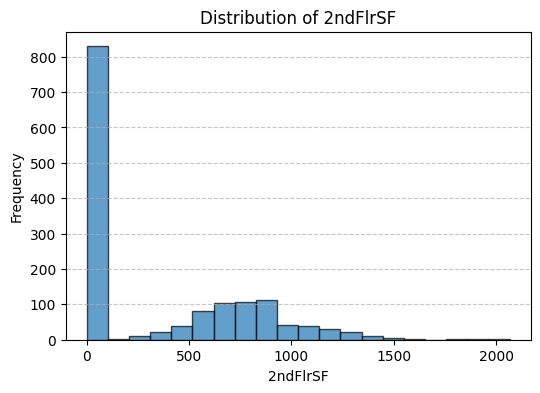

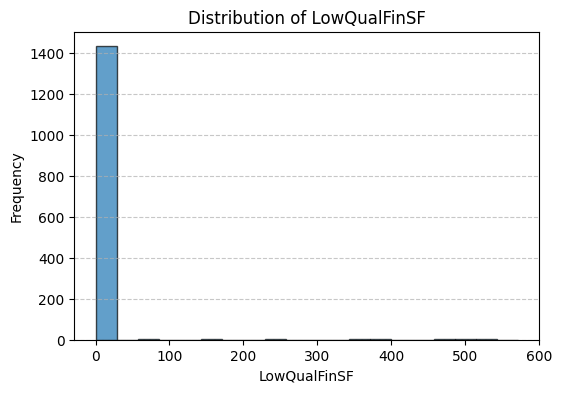

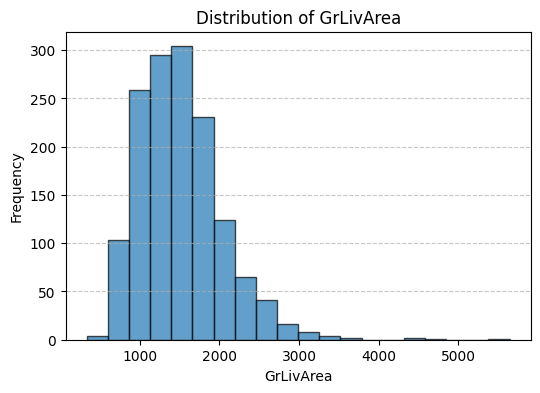

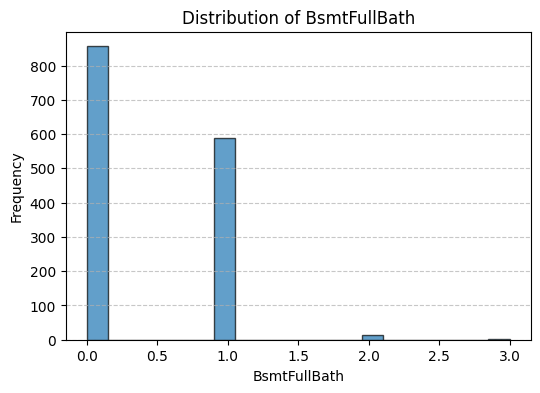

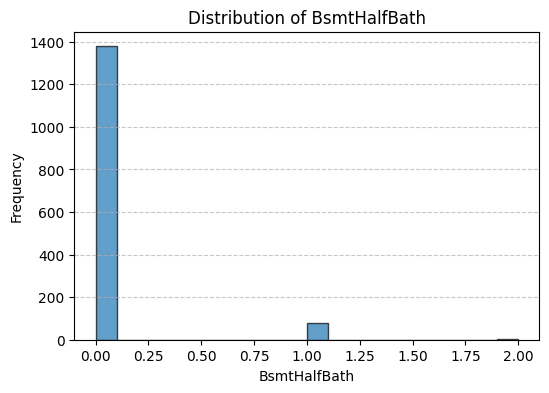

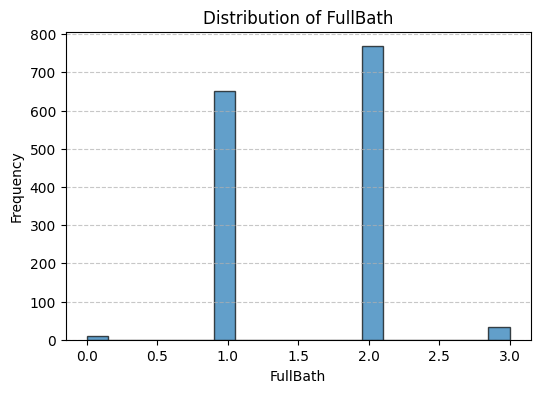

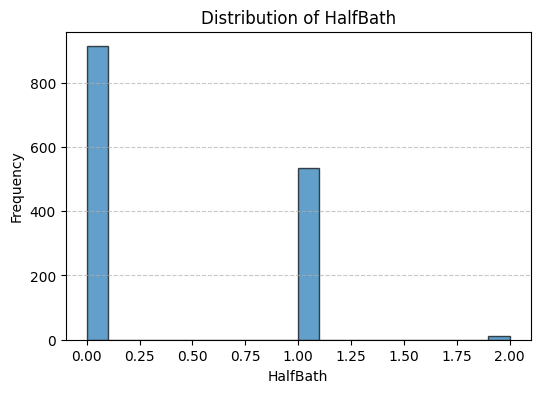

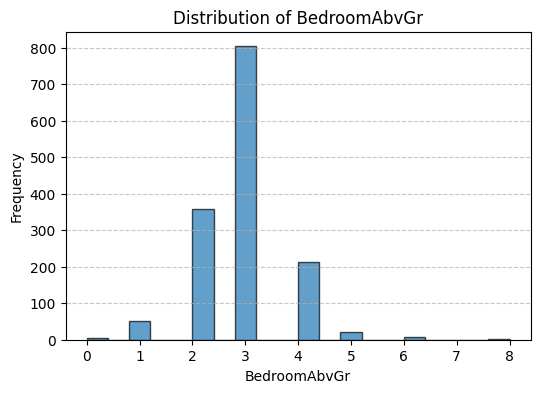

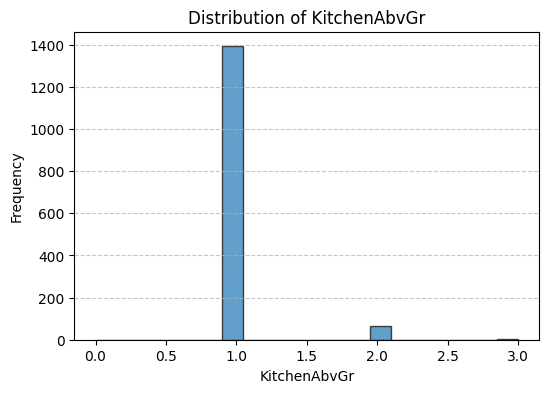

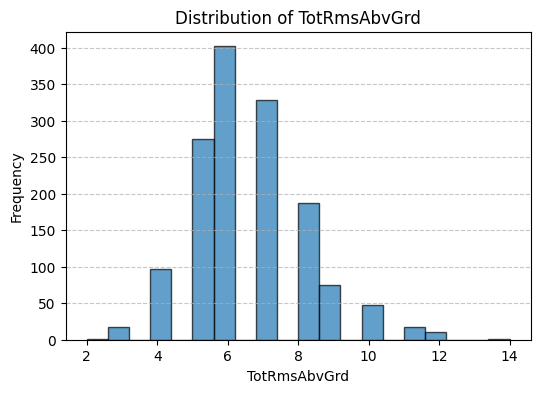

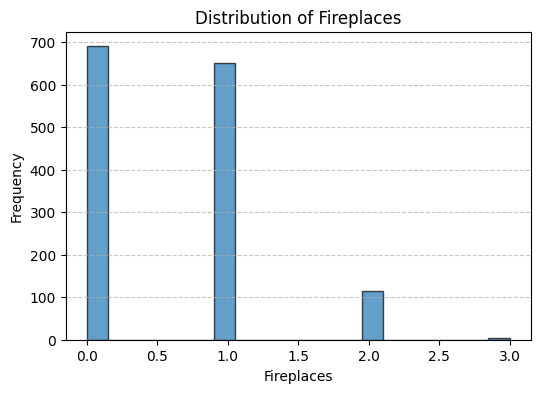

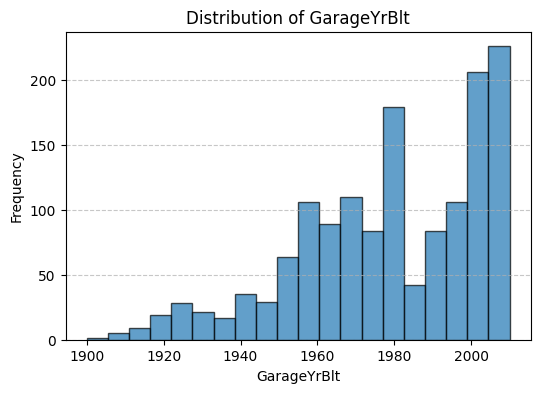

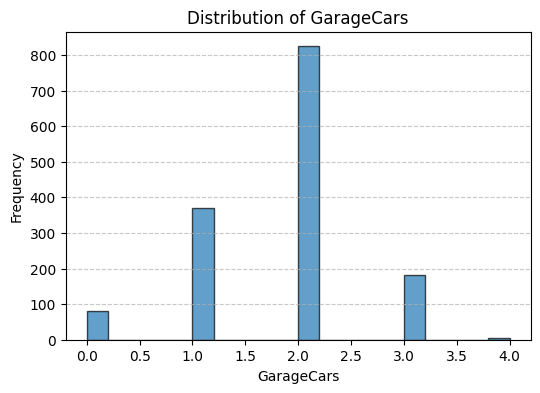

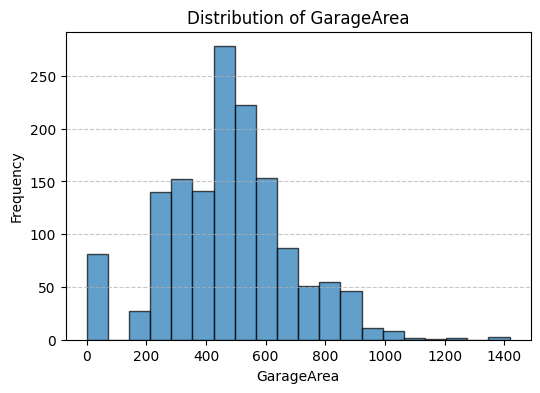

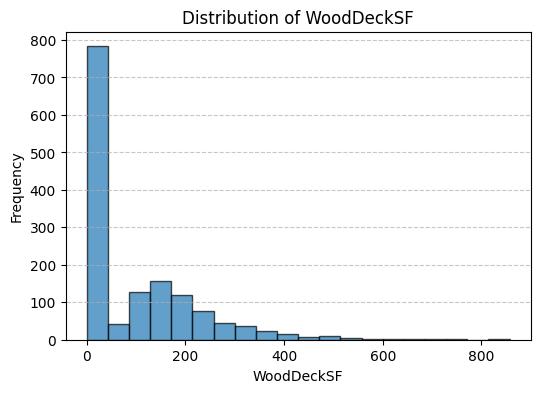

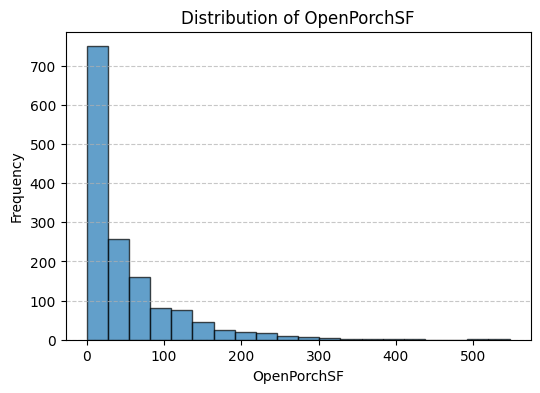

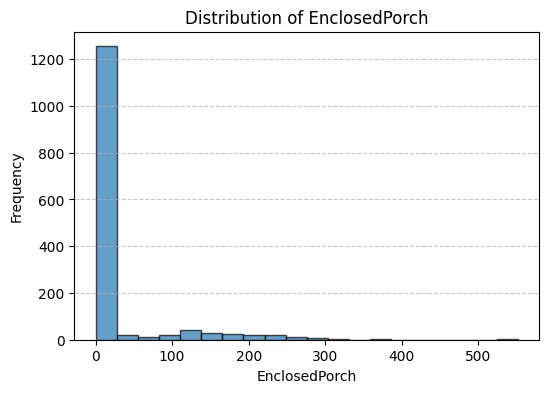

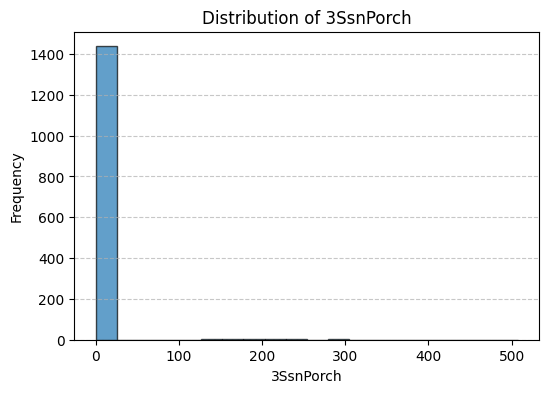

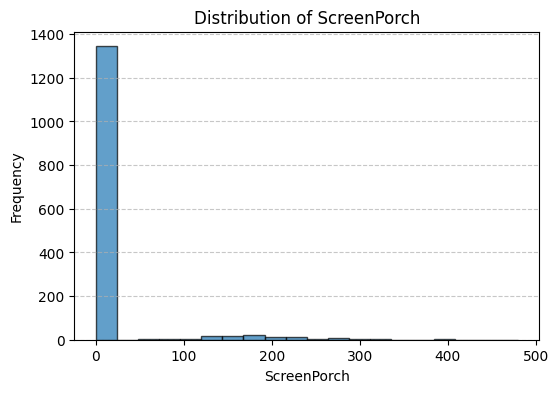

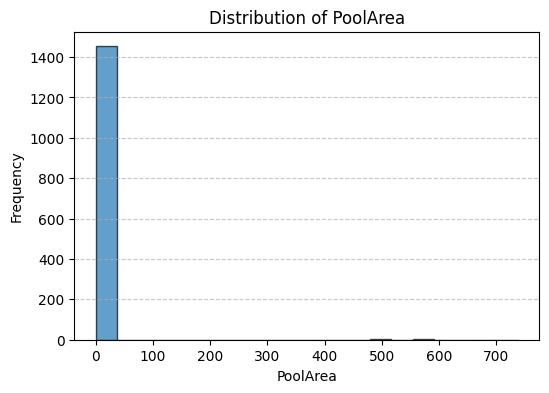

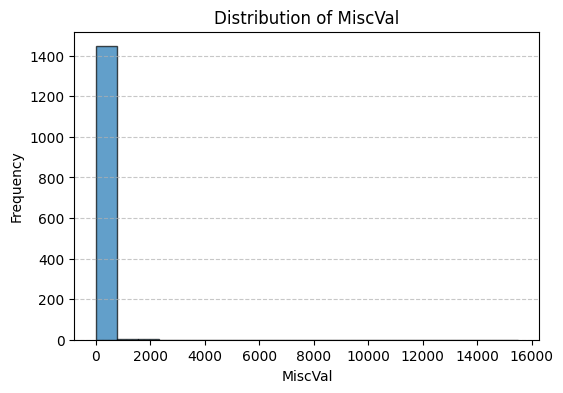

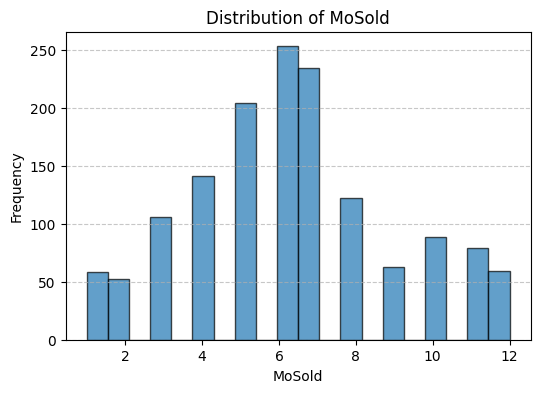

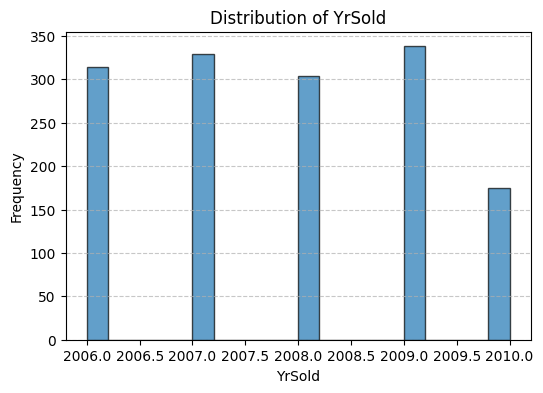

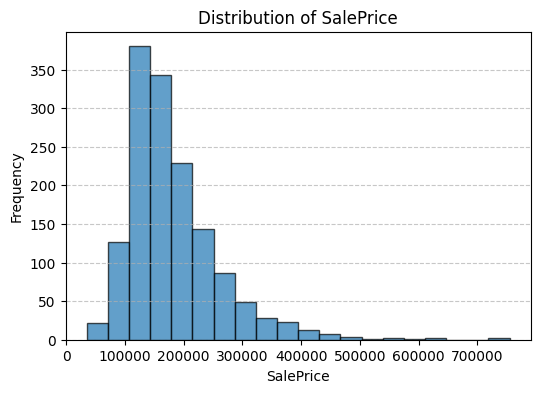

In [14]:
# numerical_features = numerical_features.drop('Id')

# Print the numerical feature names
print("Numerical Features:")
print(numerical_features.tolist())

# Create histograms for each numerical feature
plt.figure(figsize=(10, 6))
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## Choose the model --> Standardization if choosing ones sensitive to feature scales

In [15]:
# excluding "price" column
X= data.drop(columns=['SalePrice'])

y= data['SalePrice'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the number of samples in each set
print(X_train.shape[0])
print(X_test.shape[0])


1168
292


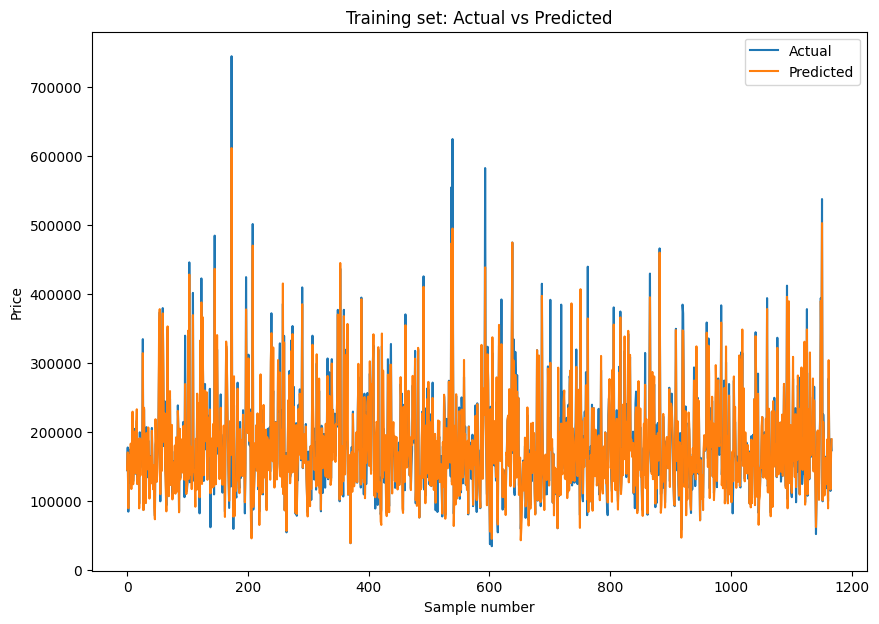

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

#Visualize the process of training
plt.figure(figsize=(10, 7))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_train)), model.predict(X_train), label='Predicted')
plt.legend()
plt.title('Training set: Actual vs Predicted')
plt.xlabel('Sample number')
plt.ylabel('Price') 
plt.show()

In [17]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
# print('Mean Squared Error:', mse)

Mean Absolute Error: 18464.068109015523


## Some large errors --> ouliers or missing features 
## --> Must be ouliers since all missing ones are being handle before 

### Using boxplot

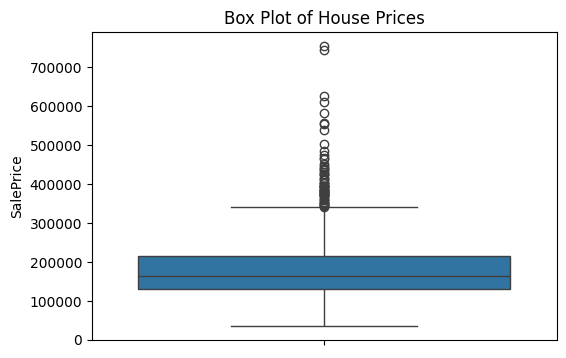

In [18]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(data['SalePrice'])
plt.title("Box Plot of House Prices")
plt.show()


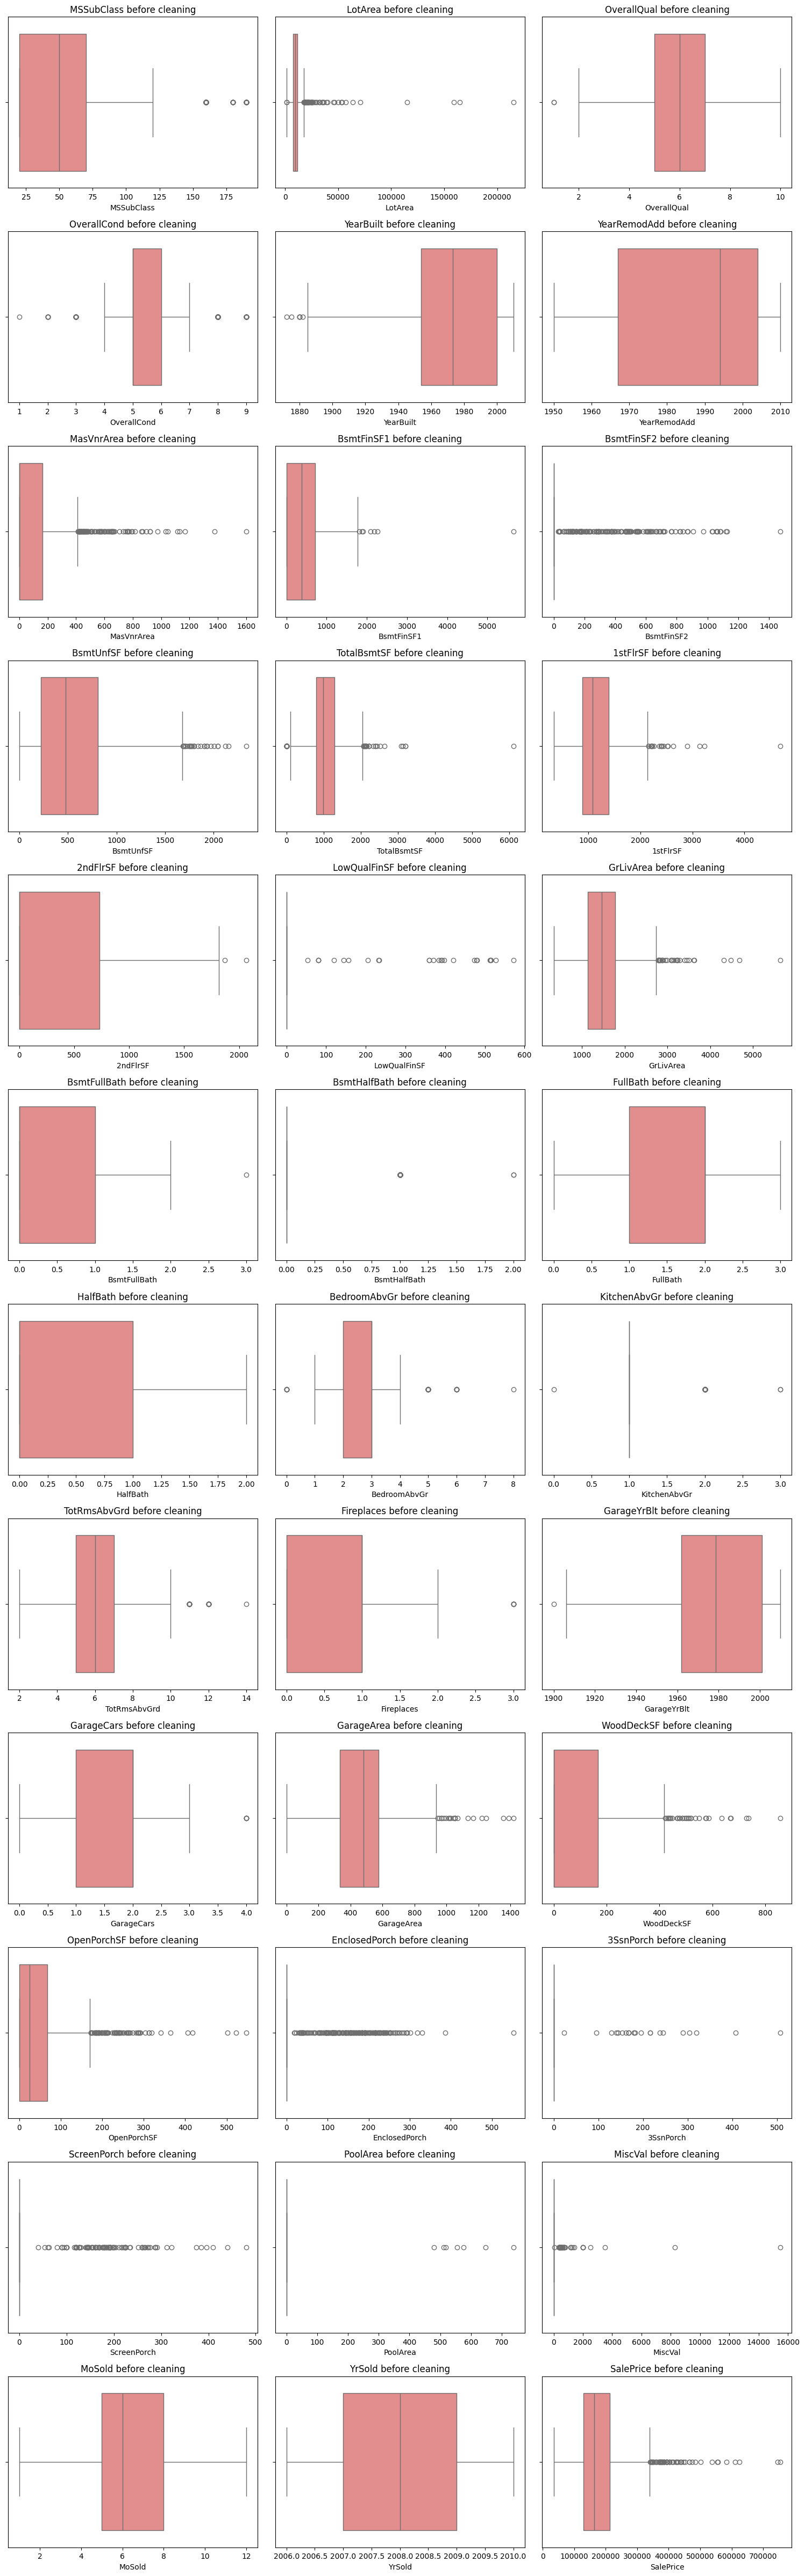

In [19]:
num_features = len(numerical_features)
cols = 3
rows = (num_features // cols) + (num_features % cols != 0)

plt.figure(figsize=(5 * cols, 4 * rows))  # Adjust width and height multipliers as needed
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=data[feature], color="lightcoral")
    plt.title(f"{feature} before cleaning")
plt.tight_layout()
plt.show()


In [20]:
def remove_outliers_iqr(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25) 
        Q3 = data[feature].quantile(0.75) 
        IQR = Q3 - Q1  
        lower_bound = Q1 - 3.0 * IQR # choose threshold = 3.0 instead of 1.5 to remove more outliers
        upper_bound = Q3 + 3.0 * IQR
        
        # Remove rows where feature value is outside the IQR bounds
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

In [21]:
def cap_outliers_by_percentile(df, columns, lower=0.01, upper=0.99):
    """
    Caps (clips) outliers in the specified columns by the given percentile bounds.
    """
    for col in columns:
        lower_val = df[col].quantile(lower)
        upper_val = df[col].quantile(upper)
        df[col] = np.clip(df[col], lower_val, upper_val)
    return df

In [22]:
# def remove_outliers_zscore(df, features, threshold=3):
#     df_cleaned = df.copy()
#     for feature in features:
#         df_cleaned = df_cleaned[np.abs(zscore(df_cleaned[feature])) < threshold]  
#     return df_cleaned

In [23]:
data_cleaned = remove_outliers_iqr(data, numerical_features)
# Print shape of data before and after removing outliers
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {data_cleaned.shape}")

Original dataset shape: (1460, 273)
Cleaned dataset shape: (819, 273)


## Check again

In [24]:
from scipy.stats.mstats import winsorize

def winsorize_columns_inplace(df, columns, lower=0.01, upper=0.01):
    for col in columns:
        # winsorize returns a masked array, so convert it to a Series
        winsorized_col = winsorize(df[col], limits=(lower, upper))
        # Assign back to the DataFrame (preserving the index)
        df[col] = pd.Series(winsorized_col, index=df.index)
    return df


# Example usage:
cols_to_winsorize = [
    'BsmtFinSF2','MasVnrArea','LowQualFinSF','GrLivArea',
    'BsmtHalfBath','KitchenAbvGr','OpenPorchSF','EnclosedPorch',
    '3SsnPorch','ScreenPorch','MiscVal'
]

data_cleaned = winsorize_columns_inplace(data_cleaned, cols_to_winsorize, lower=0.01, upper=0.01)

In [25]:
# # drop columns with low variance
# data_cleaned = data.drop(columns=['BsmtFinSF2','MasVnrArea','LowQualFinSF','BsmtHalfBath','KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal',])
# numerical_features = numerical_features.drop(['BsmtFinSF2','MasVnrArea','LowQualFinSF','BsmtHalfBath','KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])

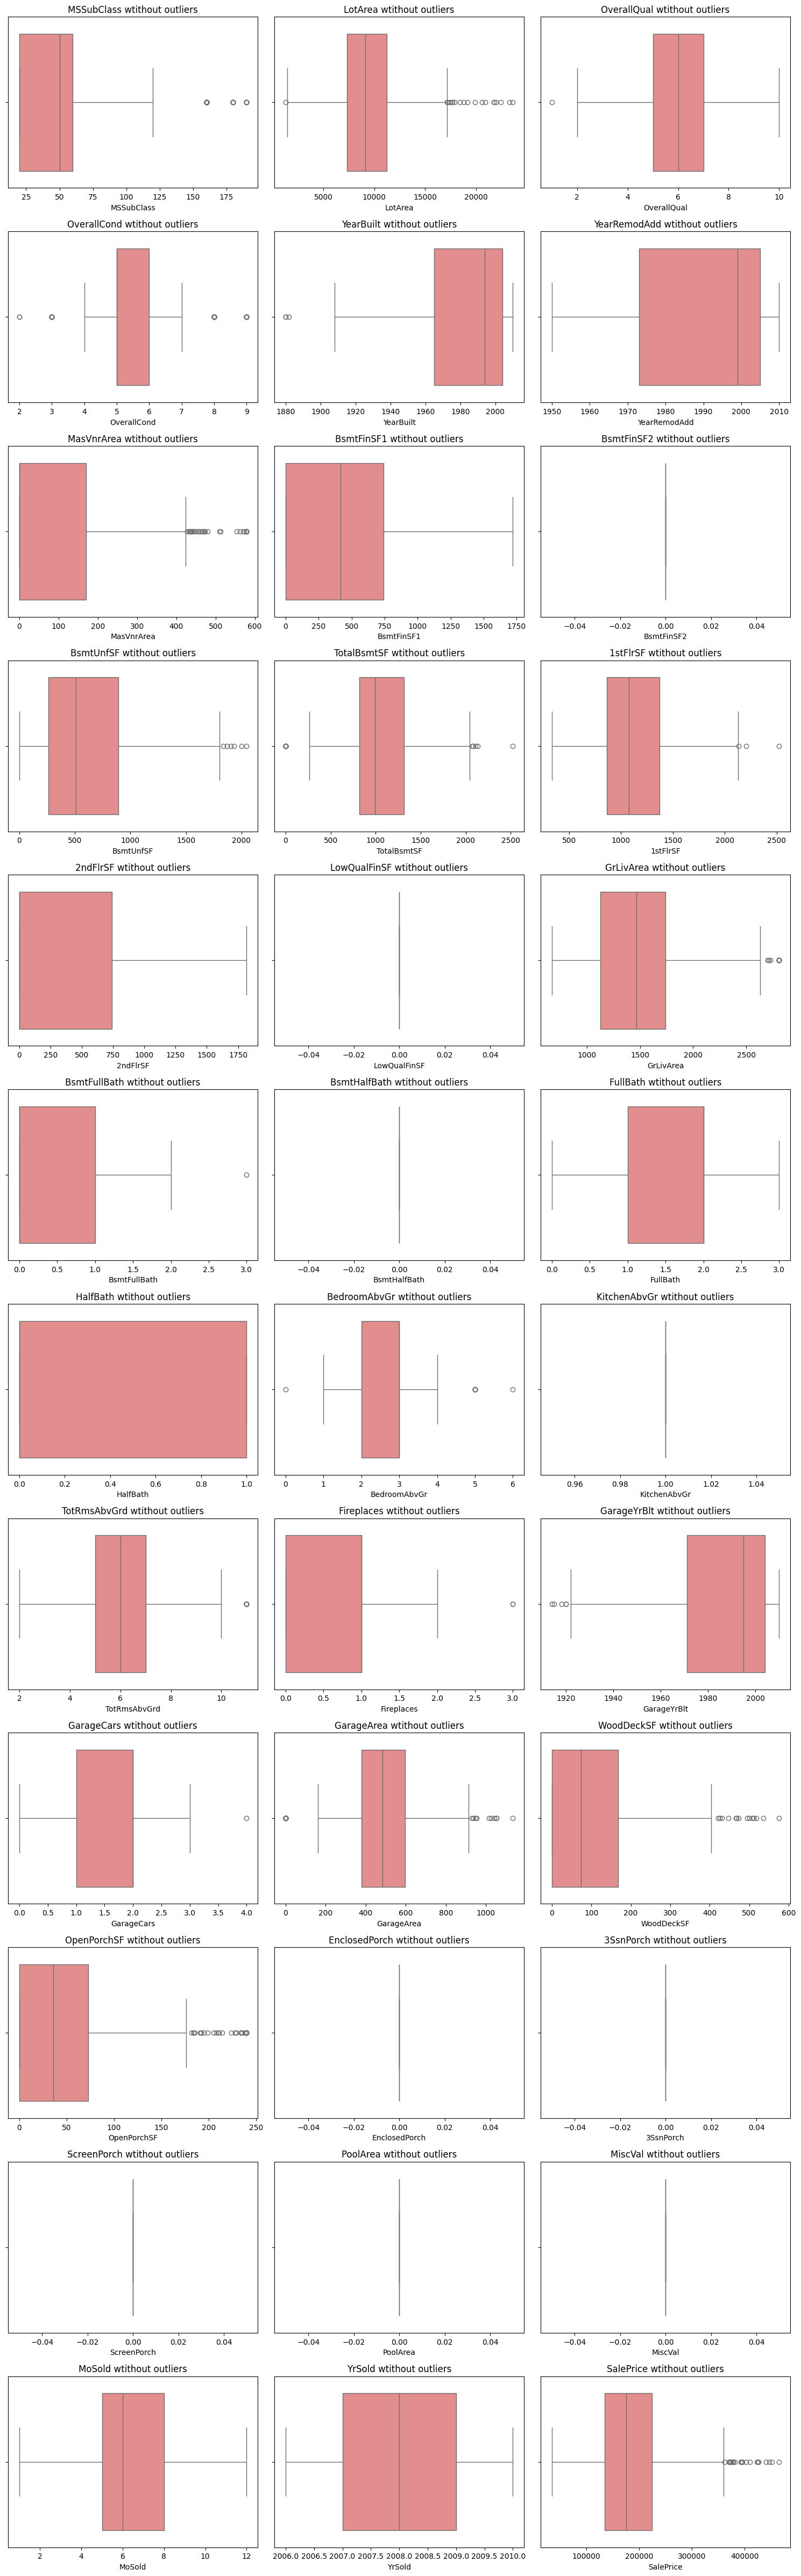

In [26]:
num_features = len(numerical_features)
cols = 3
rows = (num_features // cols) + (num_features % cols != 0)

plt.figure(figsize=(5 * cols, 4 * rows))  # Adjust width and height multipliers as needed
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=data_cleaned[feature], color="lightcoral")
    plt.title(f"{feature} wtithout outliers")
plt.tight_layout()
plt.show()

In [27]:
# excluding "price" column
X= data_cleaned.drop(columns=['SalePrice'])

y= data_cleaned['SalePrice'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the number of samples in each set
print(X_train.shape[0])
print(X_test.shape[0])


655
164


In [28]:
y_pred2 = model.predict(X_test)
#mae 
mae = mean_absolute_error(y_test, y_pred2)
#mse
mse = mean_squared_error(y_test, y_pred2)
print('Mean Absolute Error:', mae)
# print('Mean Squared Error:', mse)

Mean Absolute Error: 13800.31356643611
